# 4232М - Матниязов Азизбек - Вариант 7 - прочность бетона на сжатие

1. Загружаем необходимые пакеты и библиотеки.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score

2. Загружаем данные.

In [2]:
data = pd.read_csv('dataset_for_lab1_V7.csv').iloc[:, 1:]
print(data)


      cement  blast_furnace_slag  fly_ash  water  superplasticizer  \
0      540.0                 0.0      0.0  162.0               2.5   
1      540.0                 0.0      0.0  162.0               2.5   
2      332.5               142.5      NaN  228.0               0.0   
3      332.5               142.5      NaN  228.0               0.0   
4      198.6               132.4      0.0  192.0               0.0   
...      ...                 ...      ...    ...               ...   
1025   276.4               116.0      NaN  179.6               8.9   
1026   322.2                 0.0      NaN  196.0              10.4   
1027   148.5               139.4    108.6  192.7               6.1   
1028   159.1               186.7      0.0  175.6              11.3   
1029   260.9               100.5     78.3  200.6               8.6   

      coarse_aggregate  fine_aggregate   age  concrete_compressive_strength  
0               1040.0            676.0   28                          79.99  
1  

3. Выполняем разведочный анализ данных.

a. Ознакомимся с данными с помощью методов описательной статистики.

In [3]:
# Верхние пять строк
data.head()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,NaN,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,NaN,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [4]:
# Определим размерность набора данных
data.shape

(1030, 9)

In [5]:
# Определим типы атрибутов в данных
data.dtypes

cement                           float64
blast_furnace_slag               float64
fly_ash                          float64
water                            float64
superplasticizer                 float64
coarse_aggregate                 float64
fine_aggregate                   float64
age                                int64
concrete_compressive_strength    float64
dtype: object

In [6]:
# Получим краткое описание данных
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   cement                         1030 non-null   float64
 1   blast_furnace_slag             1030 non-null   float64
 2   fly_ash                        496 non-null    float64
 3   water                          1030 non-null   float64
 4   superplasticizer               1030 non-null   float64
 5   coarse_aggregate               1030 non-null   float64
 6   fine_aggregate                 1030 non-null   float64
 7   age                            1030 non-null   int64  
 8   concrete_compressive_strength  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [7]:
# Отобразим сводку по числовым атрибутам
data.describe()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
count,1030.000000,1030.000000,496.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,52.169556,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,62.846995,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.200000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


b. Выполним визуализацию данных.

array([[<Axes: title={'center': 'cement'}>,
        <Axes: title={'center': 'blast_furnace_slag'}>,
        <Axes: title={'center': 'fly_ash'}>],
       [<Axes: title={'center': 'water'}>,
        <Axes: title={'center': 'superplasticizer'}>,
        <Axes: title={'center': 'coarse_aggregate'}>],
       [<Axes: title={'center': 'fine_aggregate '}>,
        <Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'concrete_compressive_strength'}>]],
      dtype=object)

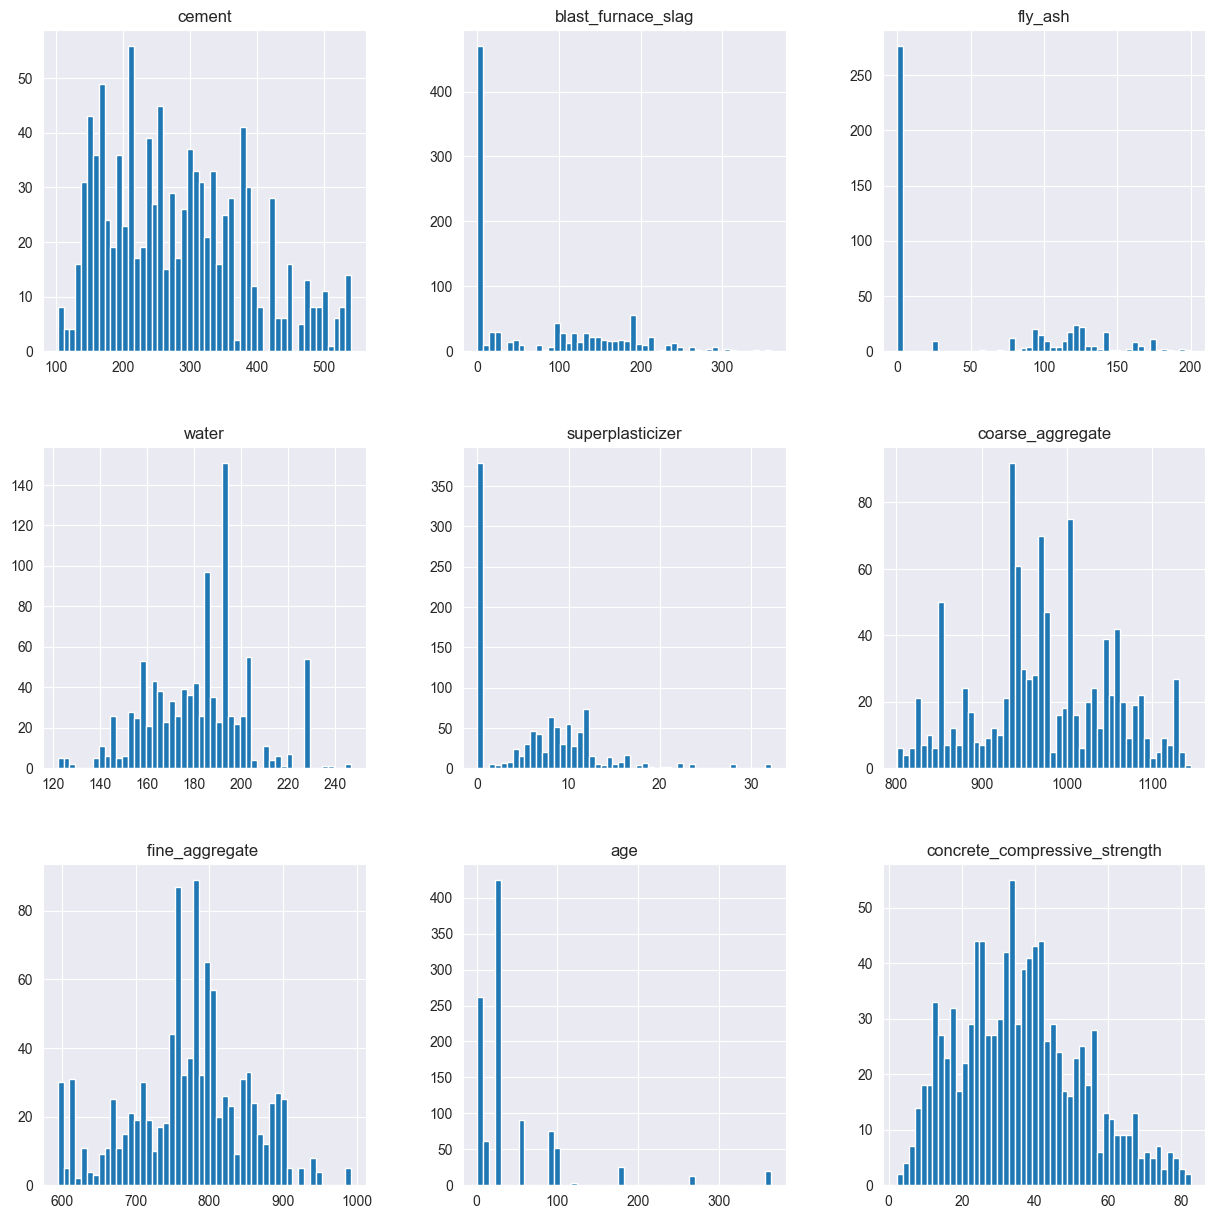

In [8]:
# Одномерная визуализация данных
data.hist(bins=50, figsize=(15, 15))

array([[<Axes: title={'center': 'cement'}>,
        <Axes: title={'center': 'concrete_compressive_strength'}>]],
      dtype=object)

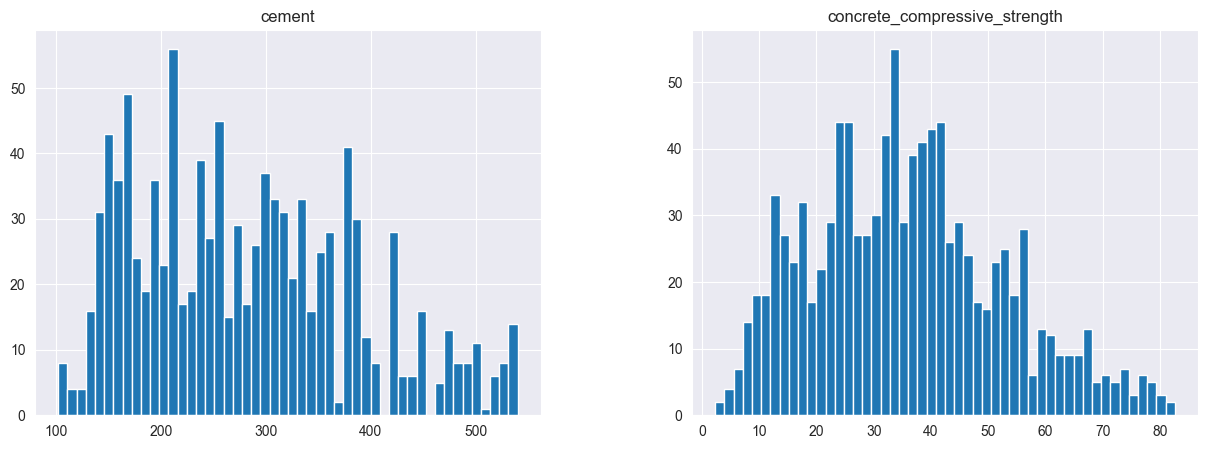

In [9]:
cement = data.cement
concrete_compressive_strength = data.concrete_compressive_strength
data1 = pd.DataFrame({'cement': cement, 'concrete_compressive_strength': concrete_compressive_strength})
data1.hist(bins=50, figsize=(15, 5))

array([[<Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>]], dtype=object)

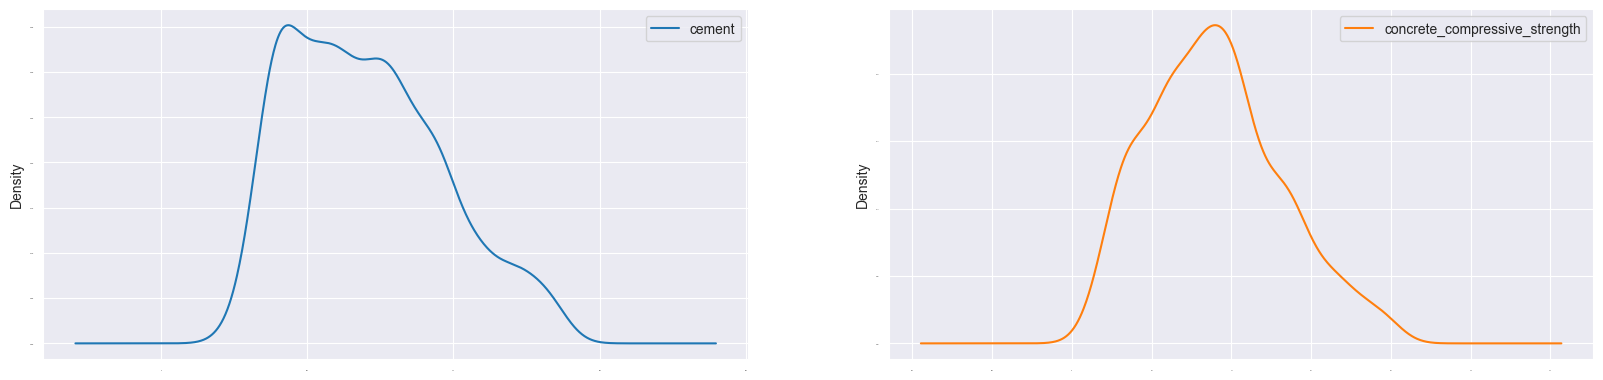

In [10]:
# графики плотности распределения
data1.plot(kind='kde', subplots=True, layout=(2, 2), sharex=False, sharey=False, legend=True, fontsize=1, figsize=(20, 10))

<Axes: title={'center': 'Correlation matrix'}>

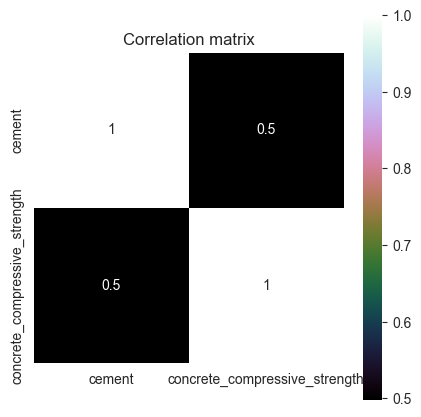

In [11]:
# Многомерная визуализация данных
correlation = data1.corr()
plt.figure(figsize=(5, 5))
plt.title('Correlation matrix')
sns.heatmap(correlation, vmax=1, square=True, annot=True, cmap='cubehelix')

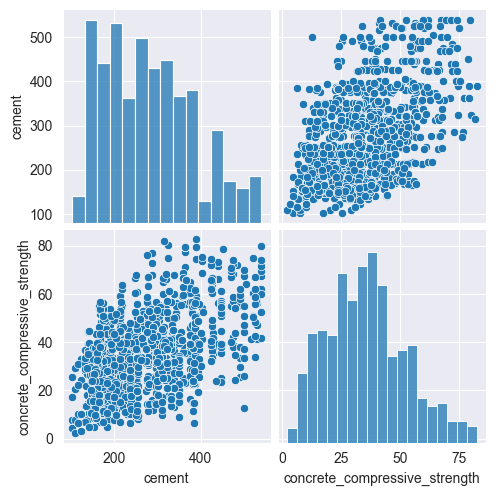

In [12]:
sns.pairplot(data1)

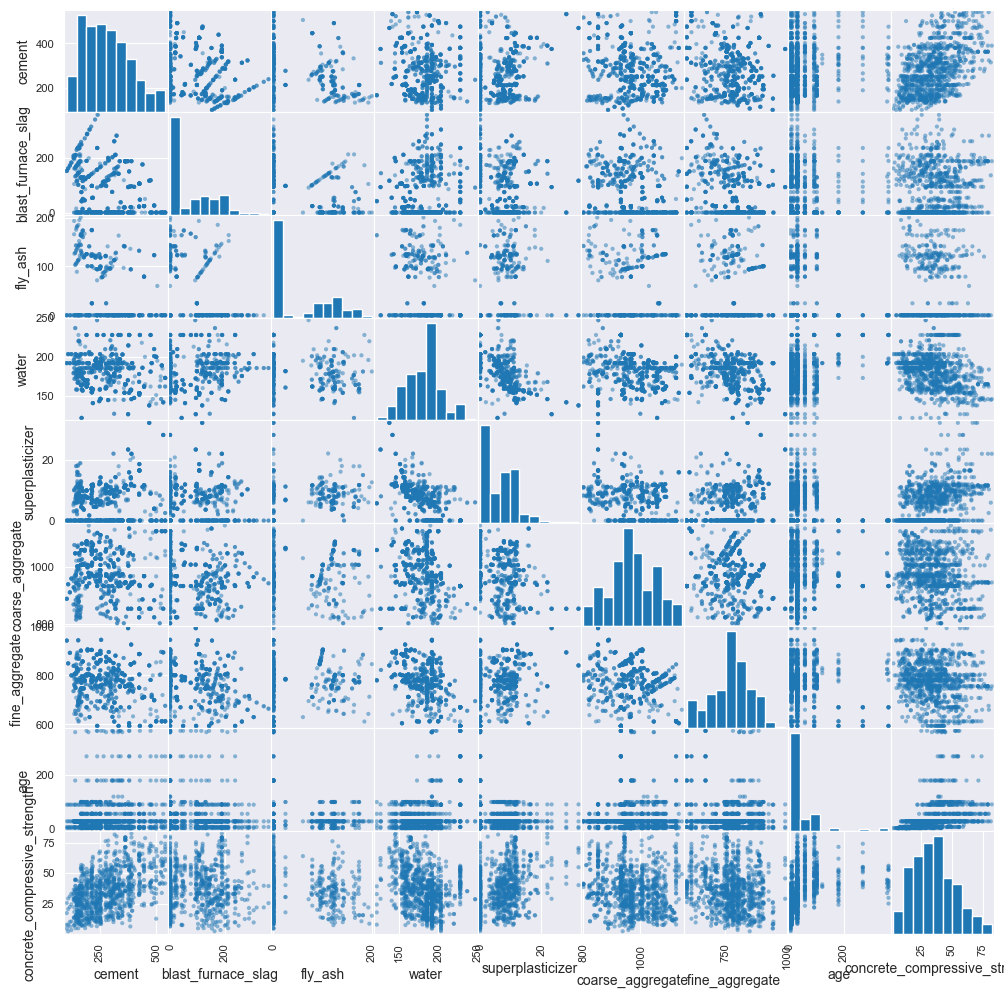

In [13]:
pd.plotting.scatter_matrix(data, figsize=(12, 12))
plt.show()

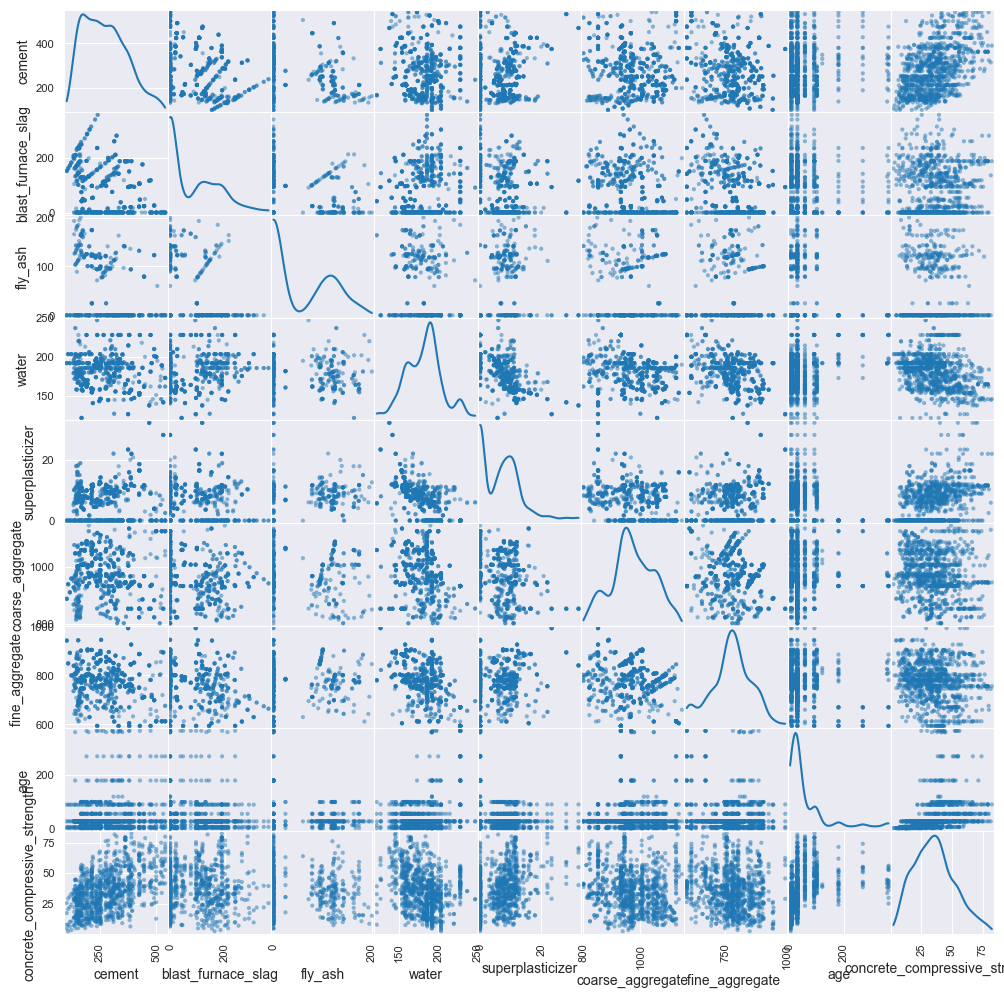

In [14]:
pd.plotting.scatter_matrix(data, diagonal='kde', figsize=(12, 12))
plt.show()

In [15]:
# поиск корреляционной зависимости между признаками
corr_matrix = data.corr()
corr_matrix

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
cement,1.000000,-0.275216,-0.382330,-0.081587,0.092386,-0.109349,-0.222718,0.081946,0.497832
blast_furnace_slag,-0.275216,1.000000,-0.329026,0.107252,0.043270,-0.283999,-0.281603,-0.044246,0.134829
fly_ash,-0.382330,-0.329026,1.000000,-0.231324,0.349923,0.003061,0.072901,-0.144291,-0.093628
water,-0.081587,0.107252,-0.231324,1.000000,-0.657533,-0.182294,-0.450661,0.277618,-0.289633
superplasticizer,0.092386,0.043270,0.349923,-0.657533,1.000000,-0.265999,0.222691,-0.192700,0.366079
coarse_aggregate,-0.109349,-0.283999,0.003061,-0.182294,-0.265999,1.000000,-0.178481,-0.003016,-0.164935
fine_aggregate,-0.222718,-0.281603,0.072901,-0.450661,0.222691,-0.178481,1.000000,-0.156095,-0.167241
age,0.081946,-0.044246,-0.144291,0.277618,-0.192700,-0.003016,-0.156095,1.000000,0.328873
concrete_compressive_strength,0.497832,0.134829,-0.093628,-0.289633,0.366079,-0.164935,-0.167241,0.328873,1.000000


<Axes: title={'center': 'Correalation Matrix'}>

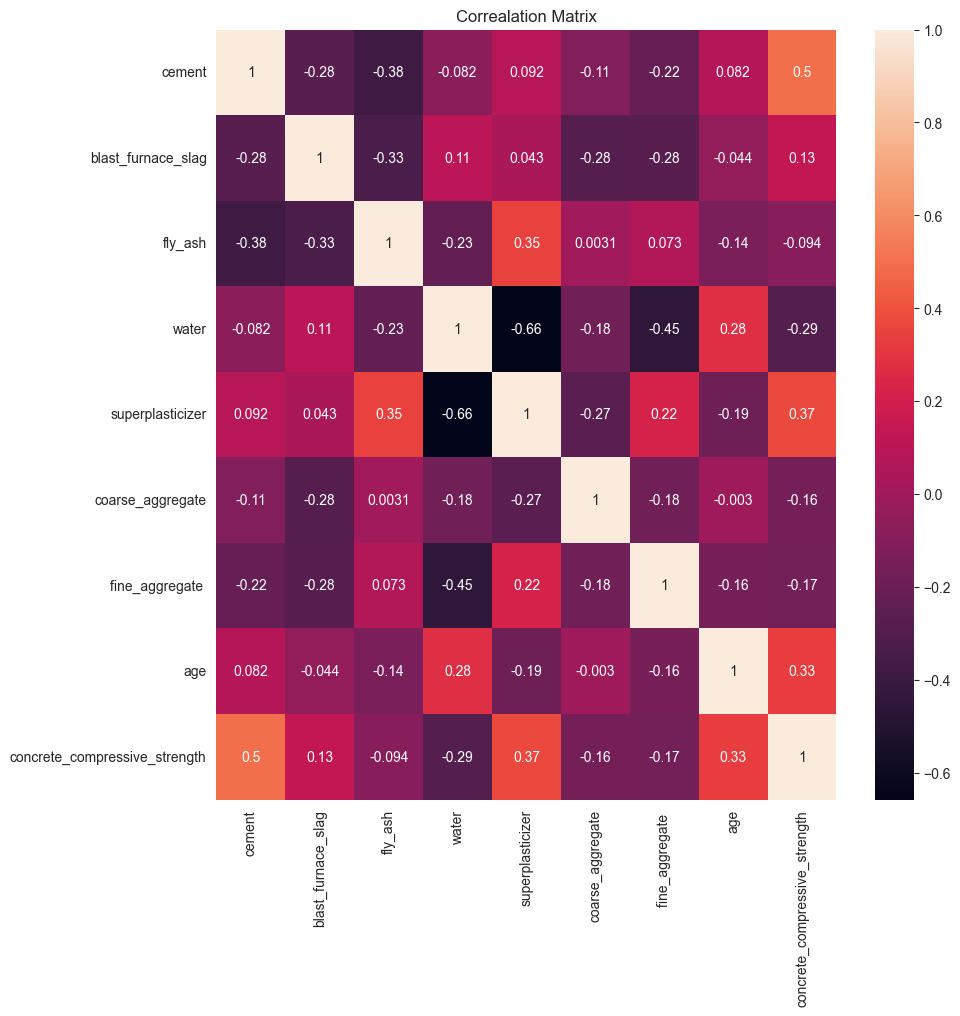

In [16]:
plt.figure(figsize=(10,10))
plt.title("Correalation Matrix")
sns.heatmap(corr_matrix, annot=True)

In [17]:
corr_matrix['concrete_compressive_strength'].sort_values(ascending=False)

concrete_compressive_strength    1.000000
cement                           0.497832
superplasticizer                 0.366079
age                              0.328873
blast_furnace_slag               0.134829
fly_ash                         -0.093628
coarse_aggregate                -0.164935
fine_aggregate                  -0.167241
water                           -0.289633
Name: concrete_compressive_strength, dtype: float64

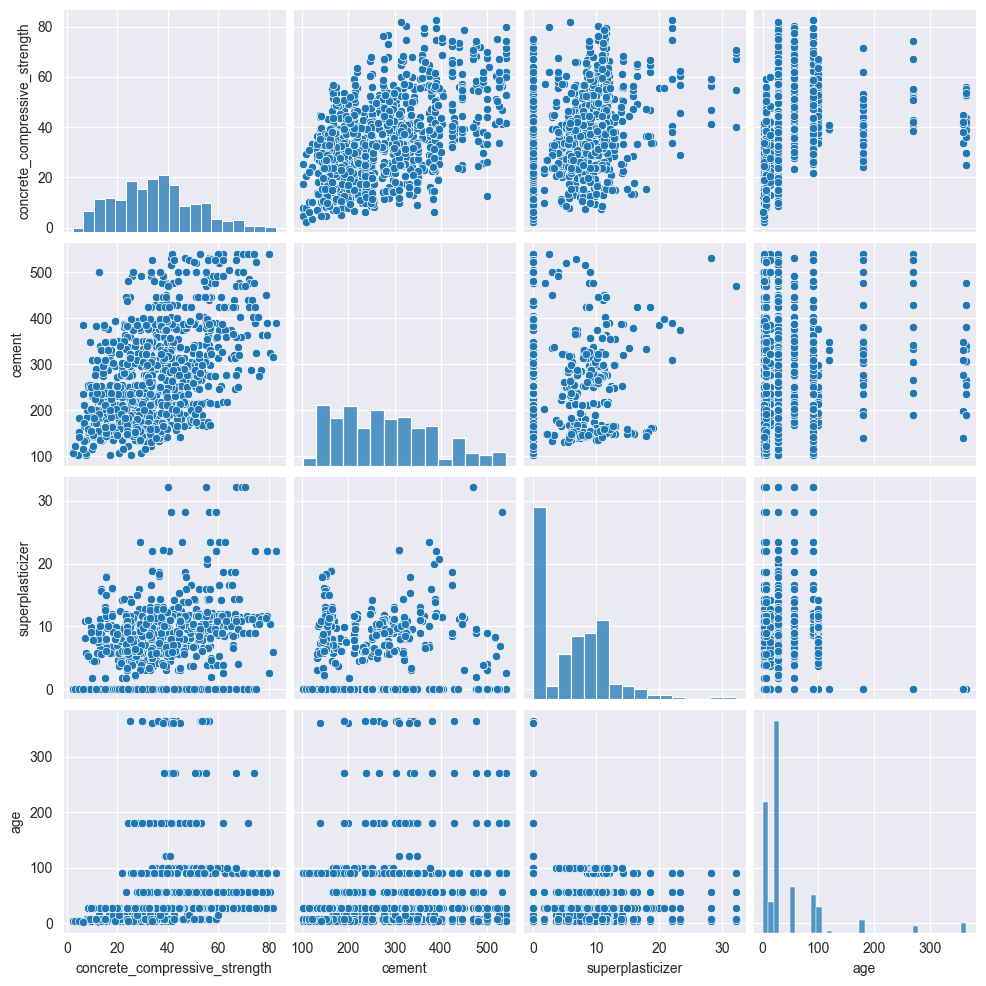

In [18]:
attributes = ['concrete_compressive_strength', 'cement', 'superplasticizer', 'age']
sns.pairplot(data[attributes])

# СТАНДАРТИЗАЦИЯ ИСХОДНОГО НАБОРА ДАННЫХ (по варианту)

In [19]:
start = data

In [20]:
# заполняем недостающие значения fly_ash средним
mean = data['fly_ash'].mean()
start['fly_ash'].fillna(mean, inplace=True)
start

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,540.0,0.0,0.000000,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.000000,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,52.169556,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,52.169556,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.000000,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,52.169556,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,52.169556,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.600000,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.000000,175.6,11.3,989.6,788.9,28,32.77


In [21]:
# Стандартизируем исходный набор данных
scaler = StandardScaler().fit(start)
start_stand = pd.DataFrame(scaler.fit_transform(start))
start_stand

,0,1,2,3,4,5,6,7,8
0,2.477915,-0.856888,-1.197426,-0.916764,-0.620448,0.863154,-1.217670,-0.279733,2.645408
1,2.477915,-0.856888,-1.197426,-0.916764,-0.620448,1.056164,-1.217670,-0.279733,1.561421
2,0.491425,0.795526,0.000000,2.175461,-1.039143,-0.526517,-2.240917,3.553066,0.266627
3,0.491425,0.795526,0.000000,2.175461,-1.039143,-0.526517,-2.240917,5.057677,0.313340
4,-0.790459,0.678408,-1.197426,0.488793,-1.039143,0.070527,0.647884,4.978487,0.507979
...,...,...,...,...,...,...,...,...,...
1025,-0.045645,0.488235,0.000000,-0.092171,0.451410,-1.323005,-0.065893,-0.279733,0.506781
1026,0.392819,-0.856888,0.000000,0.676200,0.702626,-1.994680,0.496893,-0.279733,-0.277762
1027,-1.270088,0.759579,1.295224,0.521589,-0.017528,-1.036064,0.080107,-0.279733,-0.725729
1028,-1.168610,1.308065,-1.197426,-0.279579,0.853356,0.214641,0.191166,-0.279733,-0.182539


# Разделение на обучающую и тестовую выборки

In [22]:
# для исходного набора данных
start_X = start.iloc[:,:8]
start_Y = start['concrete_compressive_strength']

test_size = 0.2
seed = 5

start_X_train, start_X_test, start_Y_train, start_Y_test = \
train_test_split(start_X, start_Y, test_size=test_size, random_state=seed)

In [23]:
# Для стандартизованного набора данных

start_stand_X = start_stand.iloc[:, :8]
start_stand_Y = start_stand.iloc[:, 8]

test_size = 0.2
seed = 5

start_stand_X_train, start_stand_X_test, start_stand_Y_train, start_stand_Y_test = \
train_test_split(start_stand_X, start_stand_Y, test_size=test_size, random_state=seed)

# Формирование набора данных с существенными признаками

In [24]:
inform = data

In [25]:
# Эксперименты с комбинациями аттрибутов

inform['water_cement_ratio'] = inform['water'] / inform['cement']
inform['superplasticizer_per_water'] = inform['superplasticizer'] / inform['water']
inform['slag_per_coarse_aggregate'] = inform['blast_furnace_slag'] / inform['coarse_aggregate']
corr_matrix = inform.corr()
corr_matrix['concrete_compressive_strength'].sort_values(ascending=False)

concrete_compressive_strength    1.000000
cement                           0.497832
superplasticizer_per_water       0.378658
superplasticizer                 0.366079
age                              0.328873
slag_per_coarse_aggregate        0.145152
blast_furnace_slag               0.134829
fly_ash                         -0.063702
coarse_aggregate                -0.164935
fine_aggregate                  -0.167241
water                           -0.289633
water_cement_ratio              -0.500692
Name: concrete_compressive_strength, dtype: float64

In [26]:
# Удаляем столбец аттрибута fly_ash

inform = inform.drop('fly_ash', axis=1)
inform

,cement,blast_furnace_slag,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength,water_cement_ratio,superplasticizer_per_water,slag_per_coarse_aggregate
0,540.0,0.0,162.0,2.5,1040.0,676.0,28,79.99,0.300000,0.015432,0.000000
1,540.0,0.0,162.0,2.5,1055.0,676.0,28,61.89,0.300000,0.015432,0.000000
2,332.5,142.5,228.0,0.0,932.0,594.0,270,40.27,0.685714,0.000000,0.152897
3,332.5,142.5,228.0,0.0,932.0,594.0,365,41.05,0.685714,0.000000,0.152897
4,198.6,132.4,192.0,0.0,978.4,825.5,360,44.30,0.966767,0.000000,0.135323
...,...,...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,179.6,8.9,870.1,768.3,28,44.28,0.649783,0.049555,0.133318
1026,322.2,0.0,196.0,10.4,817.9,813.4,28,31.18,0.608318,0.053061,0.000000
1027,148.5,139.4,192.7,6.1,892.4,780.0,28,23.70,1.297643,0.031655,0.156208
1028,159.1,186.7,175.6,11.3,989.6,788.9,28,32.77,1.103708,0.064351,0.188662


In [27]:
col = inform.pop('concrete_compressive_strength')
inform.insert(len(inform.columns), col.name, col)
inform

,cement,blast_furnace_slag,water,superplasticizer,coarse_aggregate,fine_aggregate,age,water_cement_ratio,superplasticizer_per_water,slag_per_coarse_aggregate,concrete_compressive_strength
0,540.0,0.0,162.0,2.5,1040.0,676.0,28,0.300000,0.015432,0.000000,79.99
1,540.0,0.0,162.0,2.5,1055.0,676.0,28,0.300000,0.015432,0.000000,61.89
2,332.5,142.5,228.0,0.0,932.0,594.0,270,0.685714,0.000000,0.152897,40.27
3,332.5,142.5,228.0,0.0,932.0,594.0,365,0.685714,0.000000,0.152897,41.05
4,198.6,132.4,192.0,0.0,978.4,825.5,360,0.966767,0.000000,0.135323,44.30
...,...,...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,179.6,8.9,870.1,768.3,28,0.649783,0.049555,0.133318,44.28
1026,322.2,0.0,196.0,10.4,817.9,813.4,28,0.608318,0.053061,0.000000,31.18
1027,148.5,139.4,192.7,6.1,892.4,780.0,28,1.297643,0.031655,0.156208,23.70
1028,159.1,186.7,175.6,11.3,989.6,788.9,28,1.103708,0.064351,0.188662,32.77


In [28]:
# Отбор информативных признаков

inform_X = inform.iloc[:, :10]
inform_Y = inform['concrete_compressive_strength']
bestfeatures = SelectKBest(k=6)
fit = bestfeatures.fit(inform_X, inform_Y)
scores = pd.DataFrame(fit.scores_)
columns = pd.DataFrame(inform_X.columns)
features_scores = pd.concat([columns, scores], axis=1)
features_scores

,0,0
0,cement,3.264003
1,blast_furnace_slag,2.343296
2,water,2.233896
3,superplasticizer,3.322633
4,coarse_aggregate,2.580957
5,fine_aggregate,2.183829
6,age,1.332032
7,water_cement_ratio,3.910941
8,superplasticizer_per_water,3.471248
9,slag_per_coarse_aggregate,2.337379


In [29]:
# Удаляем столбец аттрибута age

inform.drop(['age'], axis=1, inplace=True)
inform

,cement,blast_furnace_slag,water,superplasticizer,coarse_aggregate,fine_aggregate,water_cement_ratio,superplasticizer_per_water,slag_per_coarse_aggregate,concrete_compressive_strength
0,540.0,0.0,162.0,2.5,1040.0,676.0,0.300000,0.015432,0.000000,79.99
1,540.0,0.0,162.0,2.5,1055.0,676.0,0.300000,0.015432,0.000000,61.89
2,332.5,142.5,228.0,0.0,932.0,594.0,0.685714,0.000000,0.152897,40.27
3,332.5,142.5,228.0,0.0,932.0,594.0,0.685714,0.000000,0.152897,41.05
4,198.6,132.4,192.0,0.0,978.4,825.5,0.966767,0.000000,0.135323,44.30
...,...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,179.6,8.9,870.1,768.3,0.649783,0.049555,0.133318,44.28
1026,322.2,0.0,196.0,10.4,817.9,813.4,0.608318,0.053061,0.000000,31.18
1027,148.5,139.4,192.7,6.1,892.4,780.0,1.297643,0.031655,0.156208,23.70
1028,159.1,186.7,175.6,11.3,989.6,788.9,1.103708,0.064351,0.188662,32.77


# Стандартизация набора существенных признаков (по варианту)

In [30]:
# Стандартизируем набор данных с существенными признаками

scaler = StandardScaler().fit(inform)
inform_stand = pd.DataFrame(scaler.fit_transform(inform))
inform_stand

,0,1,2,3,4,5,6,7,8,9
0,2.477915,-0.856888,-0.916764,-0.620448,0.863154,-1.217670,-1.428268,-0.561907,-0.856648,2.645408
1,2.477915,-0.856888,-0.916764,-0.620448,1.056164,-1.217670,-1.428268,-0.561907,-0.856648,1.561421
2,0.491425,0.795526,2.175461,-1.039143,-0.526517,-2.240917,-0.199303,-0.956453,0.813492,0.266627
3,0.491425,0.795526,2.175461,-1.039143,-0.526517,-2.240917,-0.199303,-0.956453,0.813492,0.313340
4,-0.790459,0.678408,0.488793,-1.039143,0.070527,0.647884,0.696189,-0.956453,0.621526,0.507979
...,...,...,...,...,...,...,...,...,...,...
1025,-0.045645,0.488235,-0.092171,0.451410,-1.323005,-0.065893,-0.313788,0.310489,0.599625,0.506781
1026,0.392819,-0.856888,0.676200,0.702626,-1.994680,0.496893,-0.445904,0.400142,-0.856648,-0.277762
1027,-1.270088,0.759579,0.521589,-0.017528,-1.036064,0.080107,1.750427,-0.147131,0.849659,-0.725729
1028,-1.168610,1.308065,-0.279579,0.853356,0.214641,0.191166,1.132511,0.688778,1.204165,-0.182539


### Разделение на обучающую и тестовую выборки

In [31]:
# Для набора данных с существенными признаками

inform_X = inform.iloc[:, :9]
inform_Y = inform['concrete_compressive_strength']

test_size = 0.2
seed = 5

inform_X_train, inform_X_test, inform_Y_train, inform_Y_test = \
train_test_split(inform_X, inform_Y, test_size=test_size, random_state=seed)

In [32]:
# Для стандартизованного набора данных

inform_stand_X = inform_stand.iloc[:, :9]
inform_stand_Y = inform_stand.iloc[:, 9]

test_size = 0.2
seed = 5

inform_stand_X_train, inform_stand_X_test, inform_stand_Y_train, inform_stand_Y_test = \
train_test_split(inform_stand_X, inform_stand_Y, test_size=test_size, random_state=seed)

# Наборы данных

### Исходный

In [33]:
start

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength,water_cement_ratio,superplasticizer_per_water,slag_per_coarse_aggregate
0,540.0,0.0,0.000000,162.0,2.5,1040.0,676.0,28,79.99,0.300000,0.015432,0.000000
1,540.0,0.0,0.000000,162.0,2.5,1055.0,676.0,28,61.89,0.300000,0.015432,0.000000
2,332.5,142.5,52.169556,228.0,0.0,932.0,594.0,270,40.27,0.685714,0.000000,0.152897
3,332.5,142.5,52.169556,228.0,0.0,932.0,594.0,365,41.05,0.685714,0.000000,0.152897
4,198.6,132.4,0.000000,192.0,0.0,978.4,825.5,360,44.30,0.966767,0.000000,0.135323
...,...,...,...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,52.169556,179.6,8.9,870.1,768.3,28,44.28,0.649783,0.049555,0.133318
1026,322.2,0.0,52.169556,196.0,10.4,817.9,813.4,28,31.18,0.608318,0.053061,0.000000
1027,148.5,139.4,108.600000,192.7,6.1,892.4,780.0,28,23.70,1.297643,0.031655,0.156208
1028,159.1,186.7,0.000000,175.6,11.3,989.6,788.9,28,32.77,1.103708,0.064351,0.188662


### Исходный стандартизованный

In [34]:
start_stand

,0,1,2,3,4,5,6,7,8
0,2.477915,-0.856888,-1.197426,-0.916764,-0.620448,0.863154,-1.217670,-0.279733,2.645408
1,2.477915,-0.856888,-1.197426,-0.916764,-0.620448,1.056164,-1.217670,-0.279733,1.561421
2,0.491425,0.795526,0.000000,2.175461,-1.039143,-0.526517,-2.240917,3.553066,0.266627
3,0.491425,0.795526,0.000000,2.175461,-1.039143,-0.526517,-2.240917,5.057677,0.313340
4,-0.790459,0.678408,-1.197426,0.488793,-1.039143,0.070527,0.647884,4.978487,0.507979
...,...,...,...,...,...,...,...,...,...
1025,-0.045645,0.488235,0.000000,-0.092171,0.451410,-1.323005,-0.065893,-0.279733,0.506781
1026,0.392819,-0.856888,0.000000,0.676200,0.702626,-1.994680,0.496893,-0.279733,-0.277762
1027,-1.270088,0.759579,1.295224,0.521589,-0.017528,-1.036064,0.080107,-0.279733,-0.725729
1028,-1.168610,1.308065,-1.197426,-0.279579,0.853356,0.214641,0.191166,-0.279733,-0.182539


### Существенных признаков

In [35]:
inform

,cement,blast_furnace_slag,water,superplasticizer,coarse_aggregate,fine_aggregate,water_cement_ratio,superplasticizer_per_water,slag_per_coarse_aggregate,concrete_compressive_strength
0,540.0,0.0,162.0,2.5,1040.0,676.0,0.300000,0.015432,0.000000,79.99
1,540.0,0.0,162.0,2.5,1055.0,676.0,0.300000,0.015432,0.000000,61.89
2,332.5,142.5,228.0,0.0,932.0,594.0,0.685714,0.000000,0.152897,40.27
3,332.5,142.5,228.0,0.0,932.0,594.0,0.685714,0.000000,0.152897,41.05
4,198.6,132.4,192.0,0.0,978.4,825.5,0.966767,0.000000,0.135323,44.30
...,...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,179.6,8.9,870.1,768.3,0.649783,0.049555,0.133318,44.28
1026,322.2,0.0,196.0,10.4,817.9,813.4,0.608318,0.053061,0.000000,31.18
1027,148.5,139.4,192.7,6.1,892.4,780.0,1.297643,0.031655,0.156208,23.70
1028,159.1,186.7,175.6,11.3,989.6,788.9,1.103708,0.064351,0.188662,32.77


### Существенных признаков стандартизованный

In [36]:
inform_stand

,0,1,2,3,4,5,6,7,8,9
0,2.477915,-0.856888,-0.916764,-0.620448,0.863154,-1.217670,-1.428268,-0.561907,-0.856648,2.645408
1,2.477915,-0.856888,-0.916764,-0.620448,1.056164,-1.217670,-1.428268,-0.561907,-0.856648,1.561421
2,0.491425,0.795526,2.175461,-1.039143,-0.526517,-2.240917,-0.199303,-0.956453,0.813492,0.266627
3,0.491425,0.795526,2.175461,-1.039143,-0.526517,-2.240917,-0.199303,-0.956453,0.813492,0.313340
4,-0.790459,0.678408,0.488793,-1.039143,0.070527,0.647884,0.696189,-0.956453,0.621526,0.507979
...,...,...,...,...,...,...,...,...,...,...
1025,-0.045645,0.488235,-0.092171,0.451410,-1.323005,-0.065893,-0.313788,0.310489,0.599625,0.506781
1026,0.392819,-0.856888,0.676200,0.702626,-1.994680,0.496893,-0.445904,0.400142,-0.856648,-0.277762
1027,-1.270088,0.759579,0.521589,-0.017528,-1.036064,0.080107,1.750427,-0.147131,0.849659,-0.725729
1028,-1.168610,1.308065,-0.279579,0.853356,0.214641,0.191166,1.132511,0.688778,1.204165,-0.182539


# Сравнение гребневой и полиномиальной регрессионных моделей (по варианту)

### Для нестандартизованных наборов

In [37]:
print(f'Для исходного набора:')

model = Ridge()
model.fit(start_X_train, start_Y_train)
start_Y_pred = model.predict(start_X_train)
rmse_ridge_start = np.sqrt(mean_squared_error(start_Y_train, start_Y_pred))
r2_ridge_start = r2_score(start_Y_train, start_Y_pred)
print(f'RMSE для гребневой регрессии = {rmse_ridge_start}')
print(f'R2 для гребневой регрессии = {r2_ridge_start}')

polynomial_features = PolynomialFeatures(degree=2)
start_X_poly = polynomial_features.fit_transform(start_X_train)
model = LinearRegression()
model.fit(start_X_poly, start_Y_train)
start_Y_pred_poly = model.predict(start_X_poly)
rmse_poly_start = np.sqrt(mean_squared_error(start_Y_train, start_Y_pred_poly))
r2_poly_start = r2_score(start_Y_train, start_Y_pred_poly)
print(f'RMSE для полиномиальной регрессии = {rmse_poly_start}')
print(f'R2 для полиномиальной регрессии = {r2_poly_start}\n')

print(f'Для существенных признаков:')

model = Ridge()
model.fit(inform_X_train, inform_Y_train)
inform_Y_pred = model.predict(inform_X_train)
rmse_ridge_start_stand = np.sqrt(mean_squared_error(inform_Y_train, inform_Y_pred))
r2_ridge_start_stand = r2_score(inform_Y_train, inform_Y_pred)
print(f'RMSE для гребневой регрессии = {rmse_ridge_start_stand}')
print(f'R2 для гребневой регрессии = {r2_ridge_start_stand}')

polynomial_features = PolynomialFeatures(degree=2)
inform_X_poly = polynomial_features.fit_transform(inform_X_train)
model = LinearRegression()
model.fit(inform_X_poly, inform_Y_train)
inform_Y_pred_poly = model.predict(inform_X_poly)
rmse_poly_start_stand = np.sqrt(mean_squared_error(inform_Y_train, inform_Y_pred_poly))
r2_poly_start_stand = r2_score(inform_Y_train, inform_Y_pred_poly)
print(f'RMSE для полиномиальной регрессии = {rmse_poly_start_stand}')
print(f'R2 для полиномиальной регрессии = {r2_poly_start_stand}')

Для исходного набора:
RMSE для гребневой регрессии = 10.607979231085993
R2 для гребневой регрессии = 0.6117992810914956
RMSE для полиномиальной регрессии = 7.324097912525848
R2 для полиномиальной регрессии = 0.8149456506226179

Для существенных признаков:
RMSE для гребневой регрессии = 12.636008872479461
R2 для гребневой регрессии = 0.4491785322603875
RMSE для полиномиальной регрессии = 13.678320439243826
R2 для полиномиальной регрессии = 0.3545589826630854


##### Как видно из расчетов, RMSE и R2 гребневой регрессии на нестандартизованных данных сильно хуже, чем полиномиальной, поэтому лучшим набором является исходный, предпочтительной моделью является полиномиальная регрессия.

### Для стандартизованных наборов

In [38]:
print(f'Для исходного набора:')

model = Ridge()
model.fit(start_stand_X_train, start_stand_Y_train)
start_stand_Y_pred = model.predict(start_stand_X_train)
rmse_ridge = np.sqrt(mean_squared_error(start_stand_Y_train, start_stand_Y_pred))
r2_ridge = r2_score(start_stand_Y_train, start_stand_Y_pred)
print(f'RMSE для гребневой регрессии = {rmse_ridge}')
print(f'R2 для гребневой регрессии = {r2_ridge}')

polynomial_features = PolynomialFeatures(degree=2)
start_stand_X_poly = polynomial_features.fit_transform(start_stand_X_train)
model = LinearRegression()
model.fit(start_stand_X_poly, start_stand_Y_train)
start_stand_Y_pred_poly = model.predict(start_stand_X_poly)
rmse_poly = np.sqrt(mean_squared_error(start_stand_Y_train, start_stand_Y_pred_poly))
r2_poly = r2_score(start_stand_Y_train, start_stand_Y_pred_poly)
print(f'RMSE для полиномиальной регрессии = {rmse_poly}')
print(f'R2 для полиномиальной регрессии = {r2_poly}\n')

print(f'Для существенных признаков:')

model = Ridge()
model.fit(inform_stand_X_train, inform_stand_Y_train)
inform_stand_Y_pred = model.predict(inform_stand_X_train)
rmse_ridge = np.sqrt(mean_squared_error(inform_stand_Y_train, inform_stand_Y_pred))
r2_ridge = r2_score(inform_stand_Y_train, inform_stand_Y_pred)
print(f'RMSE для гребневой регрессии = {rmse_ridge}')
print(f'R2 для гребневой регрессии = {r2_ridge}')

polynomial_features = PolynomialFeatures(degree=2)
inform_stand_X_poly = polynomial_features.fit_transform(inform_stand_X_train)
model = LinearRegression()
model.fit(inform_stand_X_poly, inform_stand_Y_train)
inform_Y_poly_pred = model.predict(inform_stand_X_poly)
rmse_poly = np.sqrt(mean_squared_error(inform_stand_Y_train, inform_Y_poly_pred))
r2_poly = r2_score(inform_stand_Y_train, inform_Y_poly_pred)
print(f'RMSE для полиномиальной регрессии = {rmse_poly}')
print(f'R2 для полиномиальной регрессии = {r2_poly}')

Для исходного набора:
RMSE для гребневой регрессии = 0.6352997551199645
R2 для гребневой регрессии = 0.611797723678833
RMSE для полиномиальной регрессии = 0.4386309753579927
R2 для полиномиальной регрессии = 0.8149456506226183

Для существенных признаков:
RMSE для гребневой регрессии = 0.752494024907447
R2 для гребневой регрессии = 0.4553634119071017
RMSE для полиномиальной регрессии = 0.8160852740500946
R2 для полиномиальной регрессии = 0.35942234647562066


##### По данным расчетов на стандартизованных данных лучшим набором является исходный, лучшей моделью - полиномиальная регрессия

# Поиск по сетке на обучающей выборке

Степень полинома = 2
RMSE для полиномиальной регрессии = 0.4386309753579927
R2 для полиномиальной регрессии = 0.8149456506226183

Степень полинома = 3
RMSE для полиномиальной регрессии = 0.2926011377200977
R2 для полиномиальной регрессии = 0.9176520631688913

Степень полинома = 4
RMSE для полиномиальной регрессии = 0.19656141712544345
R2 для полиномиальной регрессии = 0.9628381564257495

Степень полинома = 5
RMSE для полиномиальной регрессии = 0.05893313786660643
R2 для полиномиальной регрессии = 0.9966594357212828

Степень полинома = 6
RMSE для полиномиальной регрессии = 0.0589331378666566
R2 для полиномиальной регрессии = 0.9966594357212771

Степень полинома = 7
RMSE для полиномиальной регрессии = 0.05893313786660662
R2 для полиномиальной регрессии = 0.9966594357212828

Names: [2, 3, 4, 5, 6, 7]
RMSE: [0.4386309753579927, 0.2926011377200977, 0.19656141712544345, 0.05893313786660643, 0.0589331378666566, 0.05893313786660662]
Names: [2, 3, 4, 5, 6, 7]
R2: [0.8149456506226183, 0.91765206

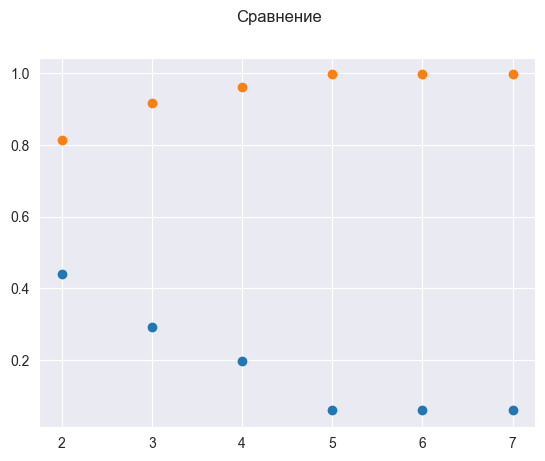

In [39]:
Deg = [2, 3, 4, 5, 6, 7]
result_rmse = []
result_r2 = []
names = []
for deg in Deg:
    polynomial_features = PolynomialFeatures(degree=deg)
    start_stand_X_poly = polynomial_features.fit_transform(start_stand_X_train)
    model = LinearRegression()
    model.fit(start_stand_X_poly, start_stand_Y_train)
    start_stand_Y_pred_poly = model.predict(start_stand_X_poly)
    rmse = np.sqrt(mean_squared_error(start_stand_Y_train, start_stand_Y_pred_poly))
    r2 = r2_score(start_stand_Y_train, start_stand_Y_pred_poly)
    result_rmse.append(rmse)
    result_r2.append(r2)
    names.append(deg)
    print(f'Степень полинома = {deg}')
    print(f'RMSE для полиномиальной регрессии = {rmse}')
    print(f'R2 для полиномиальной регрессии = {r2}\n')
print(f'Names: {names}')
print(f'RMSE: {result_rmse}')
print(f'Names: {names}')
print(f'R2: {result_r2}')

plt.plot(names, result_rmse, 'o')
plt.plot(names, result_r2, 'o')
plt.suptitle('Сравнение')
plt.show()

### Как видно из результатов, на обучающей выбороке после степени 5 полинома значения RMSE и R2 не меняются. В качестве гиперпараметра выбирается 5 степень

# Поиск по сетке на тестовой выборке

Степень полинома = 2
RMSE для полиномиальной регрессии = 0.5003284006906954
R2 для полиномиальной регрессии = 0.7024131003913147

Степень полинома = 3
RMSE для полиномиальной регрессии = 0.3854455540590322
R2 для полиномиальной регрессии = 0.8233841896852285

Степень полинома = 4
RMSE для полиномиальной регрессии = 2.6356001919594996
R2 для полиномиальной регрессии = -7.257765730056036

Степень полинома = 5
RMSE для полиномиальной регрессии = 777.8120570628167
R2 для полиномиальной регрессии = -719204.2332674925

Степень полинома = 6
RMSE для полиномиальной регрессии = 575863.0212926354
R2 для полиномиальной регрессии = -394222928539.6284

Names: [2, 3, 4, 5, 6]
RMSE: [0.5003284006906954, 0.3854455540590322, 2.6356001919594996, 777.8120570628167, 575863.0212926354]
Names: [2, 3, 4, 5, 6]
R2: [0.7024131003913147, 0.8233841896852285, -7.257765730056036, -719204.2332674925, -394222928539.6284]


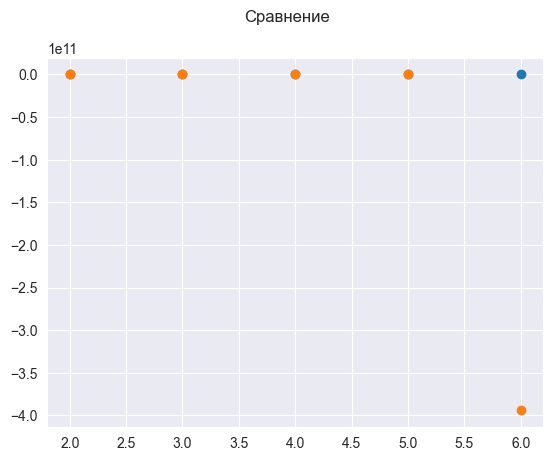

In [40]:
Deg = [2, 3, 4, 5, 6]
result_rmse = []
result_r2 = []
names = []
for deg in Deg:
    polynomial_features = PolynomialFeatures(degree=deg)
    start_stand_X_poly = polynomial_features.fit_transform(start_stand_X_train)
    model = LinearRegression()
    model.fit(start_stand_X_poly, start_stand_Y_train)
    start_stand_X_poly_test = polynomial_features.fit_transform(start_stand_X_test)
    start_stand_Y_poly_pred_test = model.predict(start_stand_X_poly_test)
    rmse = np.sqrt(mean_squared_error(start_stand_Y_test, start_stand_Y_poly_pred_test))
    r2 = r2_score(start_stand_Y_test, start_stand_Y_poly_pred_test)
    result_rmse.append(rmse)
    result_r2.append(r2)
    names.append(deg)
    print(f'Степень полинома = {deg}')
    print(f'RMSE для полиномиальной регрессии = {rmse}')
    print(f'R2 для полиномиальной регрессии = {r2}\n')
print(f'Names: {names}')
print(f'RMSE: {result_rmse}')
print(f'Names: {names}')
print(f'R2: {result_r2}')

plt.plot(names, result_rmse, 'o')
plt.plot(names, result_r2, 'o')
plt.suptitle('Сравнение')
plt.show()

### Лучшие значения на тестовой выборке дает полином степени 3